# Сегментация видов ирисов Фишера с помощью кластерного анализа 

Ирисы Фишера состоят из данных о 150 экземплярах ириса. 

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
Длина наружной доли околоцветника (англ. sepal length);
Ширина наружной доли околоцветника (англ. sepal width);
Длина внутренней доли околоцветника (англ. petal length);
Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется провести кластеризацию, определить количество кластеров, а также вид растения по данным измерений.

## Импортируем сопутствующие библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Загружаем данные

In [2]:
raw = pd.read_csv('iris_dataset.csv')
raw

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data = raw.copy()

## График данных

В нашем упражнении мы будем пытаться создать кластеры на базе формы их наружной доли околоцветника (sepal)

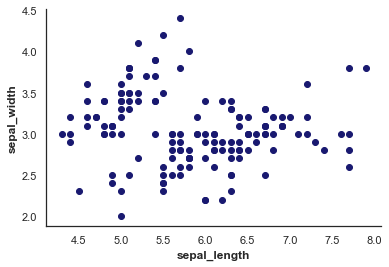

In [4]:
sns.set_style('white')
plt.scatter(data['sepal_length'],
            data['sepal_width'],
            color='midnightblue')
plt.ylabel('sepal_width',
           fontweight='bold')
plt.xlabel('sepal_length',
           fontweight='bold')
sns.despine()
plt.show()

### Кластеризация на базе нестандартизированных данных

In [5]:
x = data

## Метод локтя

Определим примерное количество кластеров.

In [6]:
wcss = []

for i in range (1,10):
    kmeans = KMeans(i).fit(x)
    wcss.append(kmeans.inertia_)

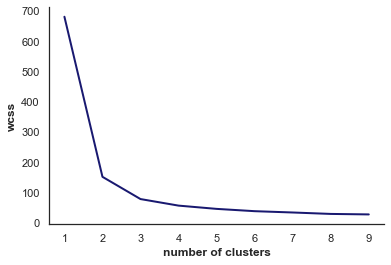

In [7]:
num = range(1,10)
sns.set_style('white')
plt.plot(num,
         wcss,
        color='midnightblue',
        lw=2)
plt.ylabel('wcss',
           fontweight='bold')
plt.xlabel('number of clusters',
           fontweight='bold')
plt.xticks(num)
sns.despine()
plt.show()

Оптимальное количество кластеров 2-4. Мы поделим на 3 (впоследствии можно пересмотреть количество)

In [8]:
kmeans = KMeans(3).fit(x)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
cluster = data.copy()
cluster['Cluster'] = kmeans.fit_predict(x)
cluster

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


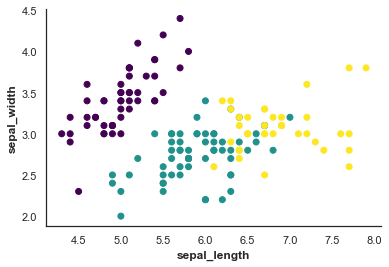

In [10]:
sns.set_style('white')
plt.scatter(data['sepal_length'],
            data['sepal_width'],
            c=cluster['Cluster'],
            cmap='viridis')
plt.ylabel('sepal_width',
           fontweight='bold')
plt.xlabel('sepal_length',
           fontweight='bold')
sns.despine()
plt.show()

Кластеры отчетливо выделяются, однако существует область "размытия". Рассмотрим пример кластеризации со стандартизированным данными.

### Кластеризация на базе стандартизированных данных

Стандартизируем данные и рассмотрим результаты кластеризации

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [12]:
kmeans_new = KMeans(3).fit(x_scaled)
kmeans_new

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
cluster_new = data.copy()
cluster_new['Cluster'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


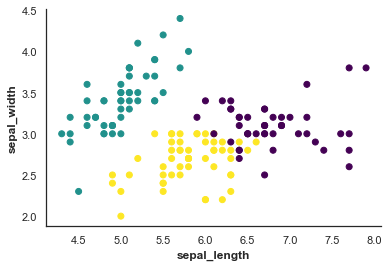

In [14]:
sns.set_style('white')
plt.scatter(cluster_new['sepal_length'],
            cluster_new['sepal_width'],
            c=cluster_new['Cluster'],
            cmap='viridis')
plt.ylabel('sepal_width',
           fontweight='bold')
plt.xlabel('sepal_length',
           fontweight='bold')
sns.despine()
plt.show()

Результат выглядит качественно границы кластеров практически четкие, области "размытия" почти нет.

### Реальные данные

Рассмотрим реально существующие данные и сравним их с нашей кластеризацией

In [15]:
new = pd.read_csv('iris_with_answers.csv')
new

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
new['species'] = new['species'].map({'setosa':1, 'versicolor':0, 'virginica':2})

In [17]:
new

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


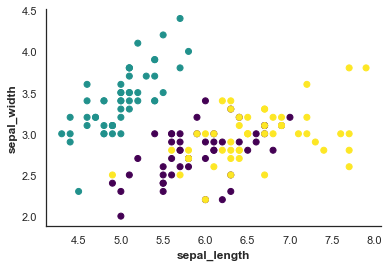

In [18]:
sns.set_style('white')
plt.scatter(new['sepal_length'],
            new['sepal_width'],
            c=new['species'],
            cmap='viridis')
plt.ylabel('sepal_width',
           fontweight='bold')
plt.xlabel('sepal_length',
           fontweight='bold')
sns.despine()
plt.show()

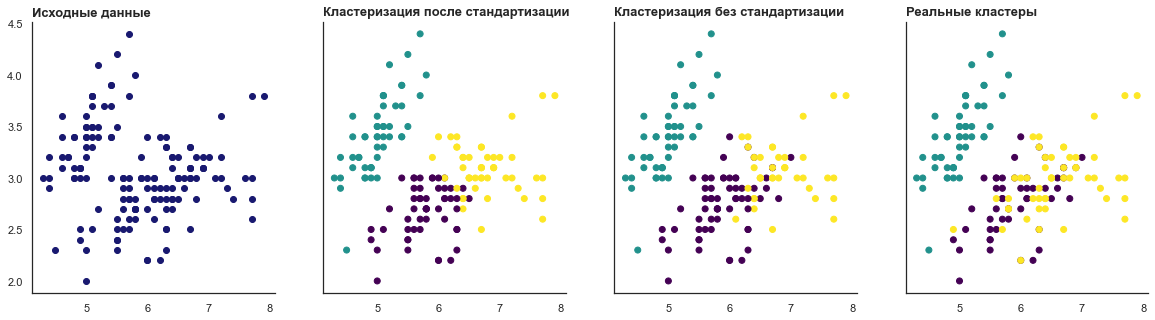

In [23]:
sns.set_style ('white')
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (20,5))
ax1.scatter(data['sepal_length'], data['sepal_width'], color='midnightblue')
ax1.set_title('Исходные данные', fontsize = 13, fontweight = 'bold', loc = 'left')

ax2.scatter(cluster_new['sepal_length'],
            cluster_new['sepal_width'],
            c=cluster_new['Cluster'],
            cmap='viridis')
ax2.set_title('Кластеризация после стандартизации', fontsize = 13, fontweight = 'bold', loc = 'left')

ax3.scatter(data['sepal_length'],
            data['sepal_width'],
            c=cluster['Cluster'],
            cmap='viridis')
ax3.set_title('Кластеризация без стандартизации', fontsize = 13, fontweight = 'bold', loc = 'left')

ax4.scatter(new['sepal_length'],
            new['sepal_width'],
            c=new['species'],
            cmap='viridis')
ax4.set_title('Реальные кластеры', fontsize = 13, fontweight = 'bold', loc = 'left')

sns.despine()
plt.show()

Удивительно, но реальные данные еще более "размыты", нежели те которые у нас получились. Таким образом, в нашем случае стандартизация не пошла на пользу.

Ради интереса, проведем кластеризацию на базе данных о внутренней доли околоцветника (petal).

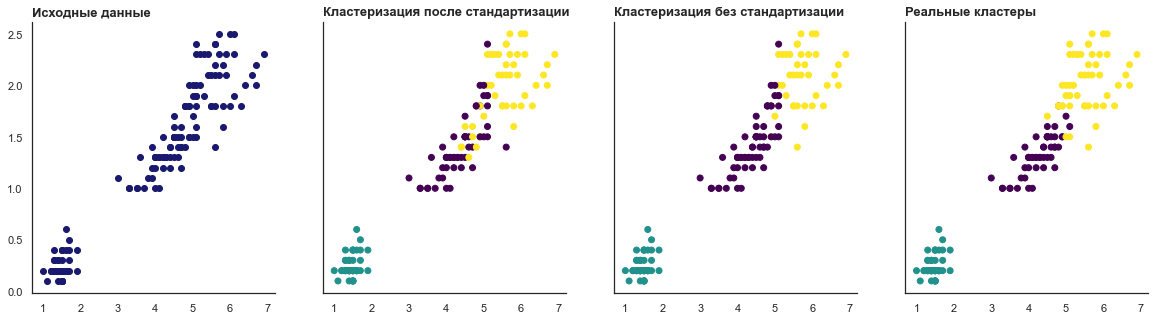

In [24]:
sns.set_style ('white')
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (20,5))
ax1.scatter(data['petal_length'], data['petal_width'], color='midnightblue')
ax1.set_title('Исходные данные', fontsize = 13, fontweight = 'bold', loc = 'left')

ax2.scatter(cluster_new['petal_length'],
            cluster_new['petal_width'],
            c=cluster_new['Cluster'],
            cmap='viridis')
ax2.set_title('Кластеризация после стандартизации', fontsize = 13, fontweight = 'bold', loc = 'left')

ax3.scatter(data['petal_length'],
            data['petal_width'],
            c=cluster['Cluster'],
            cmap='viridis')
ax3.set_title('Кластеризация без стандартизации', fontsize = 13, fontweight = 'bold', loc = 'left')

ax4.scatter(new['petal_length'],
            new['petal_width'],
            c=new['species'],
            cmap='viridis')
ax4.set_title('Реальные кластеры', fontsize = 13, fontweight = 'bold', loc = 'left')

sns.despine()
plt.show()

In [25]:
summary = pd.DataFrame()
summary['Cluster_without'] = cluster['Cluster']
summary['Cluster_with'] = cluster_new['Cluster']
summary['Cluster_orig'] = new['species']

summary

,Cluster_without,Cluster_with,Cluster_orig
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
145,2,2,2
146,0,0,2
147,2,2,2
148,2,2,2
